##  loan approval prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
f=(r"C:\Users\ashwitha\Downloads\archive (loan)")
print(os.listdir(f))

['loan_sanction_test.csv', 'loan_sanction_train.csv']


In [5]:
tr=pd.read_csv(r"C:\Users\ashwitha\Downloads\archive (loan)\loan_sanction_train.csv")
test=pd.read_csv(r"C:\Users\ashwitha\Downloads\archive (loan)\loan_sanction_test.csv")

In [7]:
tr.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## lets do data preprocessing 

In [9]:
tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
cols=['Loan_ID','Gender','Married','Education']
tr=tr.drop(cols,axis=1)
test=test.drop(cols,axis=1)

In [13]:
tr.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
test.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,No,5720,0,110.0,360.0,1.0,Urban
1,1,No,3076,1500,126.0,360.0,1.0,Urban
2,2,No,5000,1800,208.0,360.0,1.0,Urban
3,2,No,2340,2546,100.0,360.0,NaN,Urban
4,0,No,3276,0,78.0,360.0,1.0,Urban


In [17]:
tr.isnull().sum()

Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
tr['LoanAmount']=tr['LoanAmount'].fillna(tr['LoanAmount'].mean())

In [21]:
tr['Loan_Amount_Term']=tr['Loan_Amount_Term'].fillna(tr['Loan_Amount_Term'].mean())

In [23]:
tr['Credit_History']=tr['Credit_History'].fillna(tr['Credit_History'].median())

In [25]:
tr.isnull().sum()


Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
tr.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [31]:
x =tr.drop('Loan_Status',axis=1)
y =tr['Loan_Status']

In [33]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape

(491, 8)

In [37]:
Y_train.shape

(491,)

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
san= OneHotEncoder(drop='first',sparse_output=False)

In [45]:
X_train['Self_Employed']= san.fit_transform(X_train[['Self_Employed']])
X_train['Self_Employed']

83     0.0
90     0.0
227    0.0
482    0.0
464    0.0
      ... 
71     1.0
106    0.0
270    0.0
435    0.0
102    0.0
Name: Self_Employed, Length: 491, dtype: float64

In [47]:
tr['Self_Employed']=tr['Self_Employed'].fillna(tr['Self_Employed'].mode())

In [49]:
tr.isnull().sum()

Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
tr.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [53]:
tr.dtypes

Dependents            object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [144]:
X_train.dtypes

Dependents           float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

In [59]:
Y_train.unique()

array(['N', 'Y'], dtype=object)

In [61]:
Y_train=Y_train.map({"Y":1,"N":0})
y_test=y_test.map({"Y":1,"N":0})

In [63]:
Y_train

83     0
90     1
227    1
482    1
464    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 491, dtype: int64

In [106]:
tr['Dependents']=tr['Dependents'].fillna(tr['Dependents'].mode()[0])

x_test['Dependents']=x_test['Dependents'].fillna(x_test['Dependents'].mode()[0])

In [71]:
X_train.isnull().sum()

Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [75]:
X_train.dtypes

Dependents            object
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [108]:
tr['Property_Area']= san.fit_transform(tr[['Property_Area']])
tr['Property_Area']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Property_Area, Length: 614, dtype: float64

In [110]:
tr['Dependents']= san.fit_transform(tr[['Dependents']])
tr['Dependents']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    0.0
611    1.0
612    0.0
613    0.0
Name: Dependents, Length: 614, dtype: float64

In [118]:
tr['Self_Employed']=tr['Self_Employed'].map({"Yes":1,"No":0})

In [122]:
tr['Loan_Status']=tr['Loan_Status'].map({"Y":1,"N":0})

In [124]:
tr.dtypes

Dependents           float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

## scalling the data


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

num_cols = X_train.select_dtypes(exclude="object").columns
cat_cols = X_train.select_dtypes(include="object").columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, Y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Dependents', 'Self_Employed', 'Property_Area'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [47]:
tr.dtypes

Dependents            object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [57]:
counts=tr['Loan_Status'].value_counts()
counts=tr['Loan_Status'].value_counts(normalize=True)

In [59]:
tr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [61]:
tr.isnull().sum()

Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

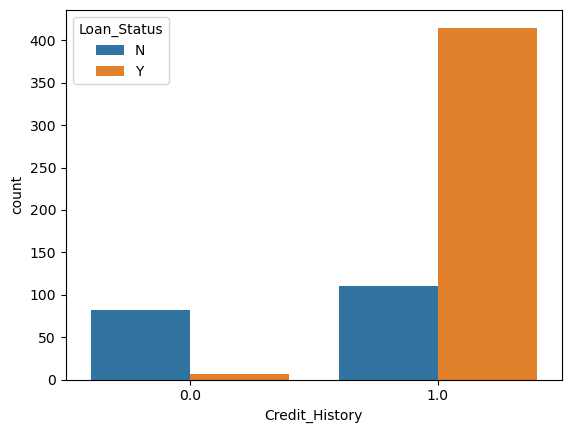

In [63]:
import seaborn as sns
sns.countplot(x="Credit_History",hue="Loan_Status",data=tr)

In [71]:
from sklearn.ensemble import RandomForestClassifier
model=Pipeline([
    ("preprocessor",preprocessor),
    ("classifier",RandomForestClassifier(random_state=42))
])
model.fit(X_train,Y_train)
y_pred = model.predict(x_test)


In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5,scoring="accuracy")
print(scores)
print(scores.mean())

[0.7804878  0.71544715 0.78861789 0.78861789 0.79508197]
0.7736505397840864


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__class_weight": [None, "balanced"]
}

grid = GridSearchCV(log_model, param_grid, cv=5, scoring="f1")
grid.fit(X_train, Y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


C:\Users\ashwitha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ashwitha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ashwitha\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ashwitha\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\ashwitha\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py"

Best Params: {'classifier__C': 0.01, 'classifier__class_weight': None}
Best CV Score: nan


In [87]:
best_log = grid.best_estimator_
y_pred = best_log.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [91]:
import joblib
joblib.dump(model,"loan_approval_model.pkl")
print("model saved")

model saved
